In [1]:
!pip install mne
#MNE (MNE-Python) is a Python package for working with EEG

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from scipy.io import loadmat
data = loadmat('/content/drive/MyDrive/Capstone/Data/ADHD/v10p.mat')

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Apr 12 15:32:35 2020',
 '__version__': '1.0',
 '__globals__': [],
 'v10p': array([[ 261.,  402.,   16., ...,  121.,  367.,  121.],
        [ 121.,  191.,  -94., ...,   15.,  121.,  -19.],
        [ -55.,   85., -204., ...,  -55.,  261.,   85.],
        ...,
        [ 191.,  156.,  163., ...,  261.,  261.,  121.],
        [ 226.,   85.,   89., ...,  121.,  -55., -125.],
        [  15.,   15., -131., ...,   85.,   85.,  -19.]])}

In [5]:
#data from .mat file is a dictionary , the readings are stored under file name as key, v3p is a sample filename used
eeg_data = data['v10p']
#we transpose as we require the data to be in the form of (num_channels,num_samles)
eeg_data=eeg_data.transpose()
eeg_data.shape

(19, 14304)

Fz: Frontal midline

Cz: Central midline

Pz: Parietal midline

C3: Left central

T3: Left temporal

C4: Right central

T4: Right temporal

Fp1: Frontal polar (left)

Fp2: Frontal polar (right)

F3: Left frontal

F4: Right frontal

F7: Left frontal (anterior)

F8: Right frontal (anterior)

P3: Left parietal

P4: Right parietal

T5: Left posterior temporal

T6: Right posterior temporal

O1: Left occipital

O2: Right occipital






In [6]:
import numpy as np
import mne

# eeg_data is a numpy array with shape (n_channels, n_samples)
#channel_names provided in dataset

#The list of channel names you provided represents EEG electrode placements on the scalp according to the 10-20 system, a widely used standard for describing the locations of EEG electrodes. Each of these channel names corresponds to a specific position on the scalp where EEG recordings are typically taken.

ch_names = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']  # List of channel names
sfreq = 128  # Sampling frequency also provided in dataset

# Create MNE info structure
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

# Create MNE Raw object
raw = mne.io.RawArray(data=eeg_data, info=info)
raw.set_eeg_reference()
#raw.filter(l_freq=4, h_freq=30)



Creating RawArray with float64 data, n_channels=19, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawArray | 19 x 14304 (111.7 s), ~2.1 MB, data loaded>

In [7]:
raw.filter(l_freq=4, h_freq=30)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawArray | 19 x 14304 (111.7 s), ~2.1 MB, data loaded>

In [8]:
epochs = mne.make_fixed_length_events(raw, duration=4, overlap=1)
epochs.shape

(36, 3)

In [9]:
print(eeg_data)
import numpy as np

def count_equal_rows(matrix):
    count = 0
    num_rows = matrix.shape[0]

    for i in range(num_rows - 1):
        for j in range(i + 1, num_rows):
            if np.array_equal(matrix[i], matrix[j]):
                count += 1

    return count
equal_row_count = count_equal_rows(eeg_data)
equal_row_count

[[ 7.81597009e-14 -1.44758217e+02 -1.88355011e+02 ...  4.85753330e+01
   9.48819291e+01 -4.13002965e-14]
 [ 7.10542736e-15 -1.75051672e+02 -2.72699456e+02 ... -3.88385223e+01
  -8.04049412e+00 -1.33226763e-14]
 [-1.06581410e-14 -5.55774157e+01 -3.90690396e+01 ...  1.23235776e+02
   1.29202812e+02 -3.64153152e-14]
 ...
 [-1.06581410e-14 -2.97006438e+01 -3.53229778e+01 ...  2.07705248e+00
  -2.60016730e+01  6.48370246e-14]
 [-1.06581410e-14 -4.58561448e+01 -6.79485655e+01 ... -4.27540668e+01
  -8.61027948e+01  3.01980663e-14]
 [-3.19744231e-14  6.13127893e+01  5.47608935e+01 ... -1.12052706e+02
  -1.06858039e+02 -1.06581410e-14]]


0

Using matplotlib as 2D backend.


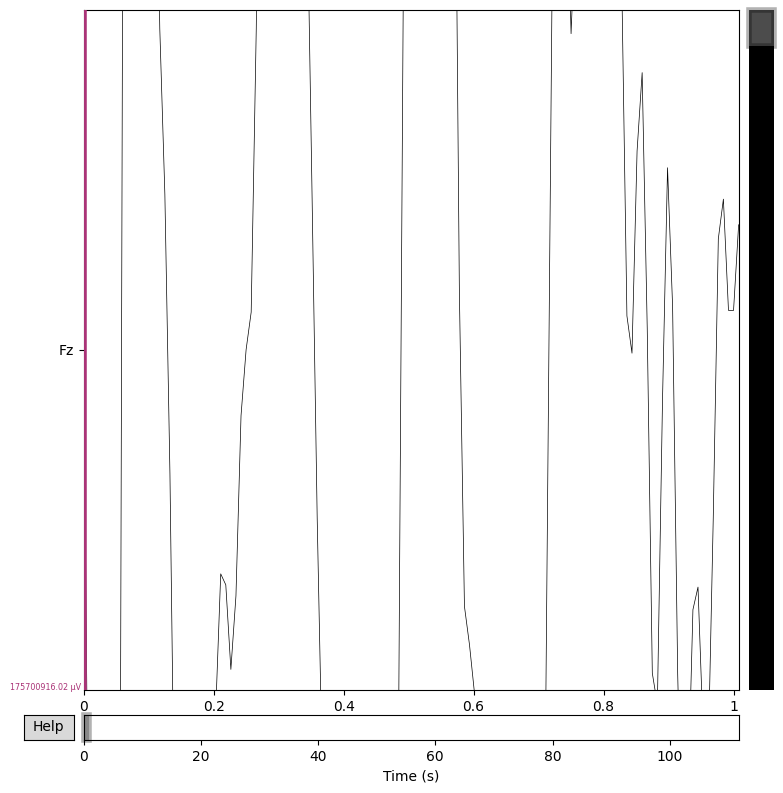

In [10]:
#eeg plot
raw.plot(duration=1, n_channels=1,scalings='auto');
#128*5(duratuion)


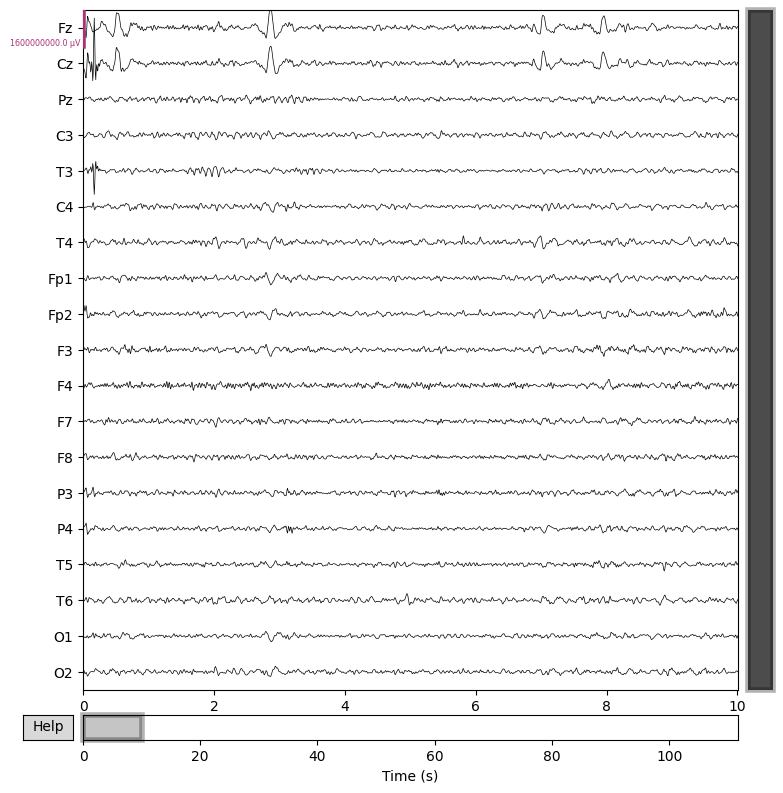

In [11]:
scalings = {'eeg': 800}
raw.plot(n_channels=19,scalings=scalings);


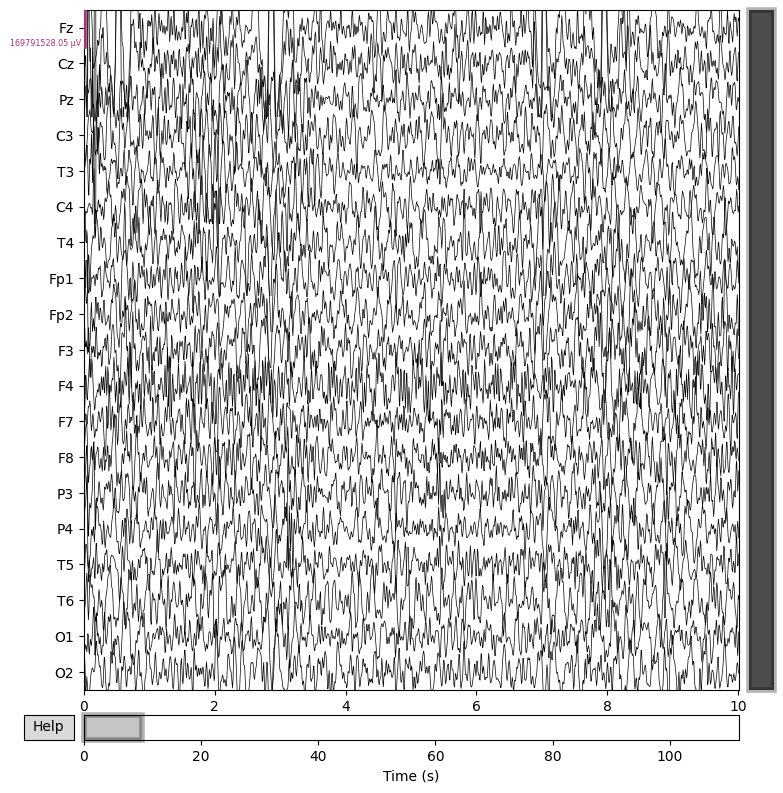

In [12]:
raw.plot(n_channels=19,scalings='auto');


In [13]:
ica=mne.preprocessing.ICA(n_components=19, random_state=97, max_iter=800)

In [14]:
ica.fit(raw.copy().filter(0.5,45))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (6.602 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 2.1s.


<ipython-input-14-1dfed6b5fb31>:1: RuntimeWarning: Using n_components=19 (resulting in n_components_=19) may lead to an unstable mixing matrix estimation because the ratio between the largest (5.7) and smallest (3.9e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 18
  ica.fit(raw.copy().filter(0.5,45))


Method,fastica
Fit,45 iterations on raw data (14304 samples)
ICA components,19
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


In [15]:
bad_idx1,scores=ica.find_bads_eog(raw,'Cz',threshold=2)
bad_idx2,scores=ica.find_bads_eog(raw,'Pz',threshold=2)

print(bad_idx1,bad_idx2)

Using EOG channel: Cz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

Using EOG channel: Pz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [16]:
ica.exclude=[5, 0, 2]


Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components


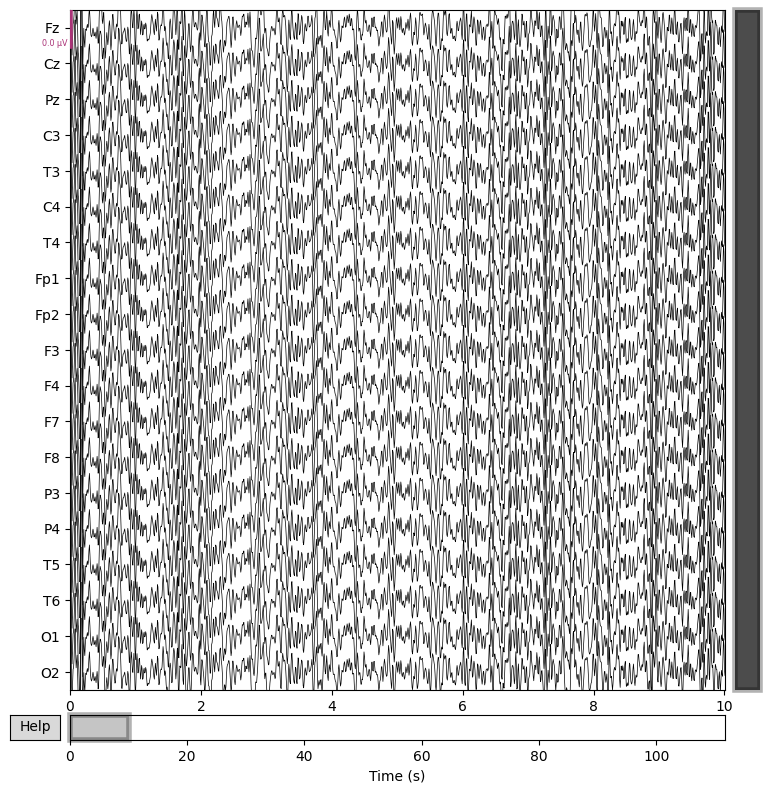

In [17]:
scalings = {'eeg': 800}
ica.apply(raw.copy() , exclude=ica.exclude).plot(n_channels=19,scalings='auto');


In [18]:
import scipy.io
import pandas as pd

# Load .mat file
mat_file = '/content/drive/MyDrive/Capstone/Data/ADHD/v3p.mat'
data = scipy.io.loadmat(mat_file)
#eeg_data = data['v3p']


# Extract EEG data from the loaded data
eeg_data = data['v3p']  # Update with the appropriate variable name

# Convert EEG data to a Pandas DataFrame
df = pd.DataFrame(eeg_data)

# Export DataFrame to CSV
csv_output = 'output_file.csv'  # Update with the desired CSV file name
df.to_csv(csv_output, index=False)


In [19]:
N = len(eeg_data)
f_s = 128             # sampling frequency (Hz)
T_s = 1 / f_s         # sampling period (s)
t = T_s * N           # length of the data in seconds
t_vec  = np.arange(0, t, T_s) # array of numbers for seconds from 0 to t

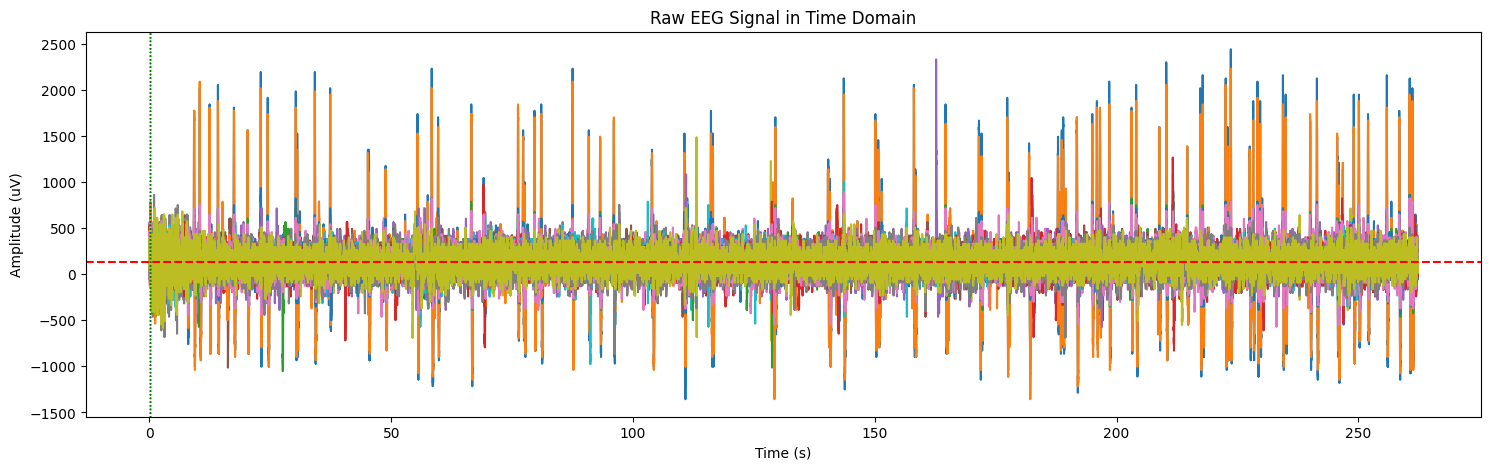

In [20]:
#raw EEG signal in time domain
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
plt.plot(t_vec, eeg_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('Raw EEG Signal in Time Domain')

# Add a horizontal line at amplitude = 100
plt.axhline(y=134.8250442907985, color='r', linestyle='--')


# Find the indices where amplitude > 100 and time is in the range of 20-70 ms
indices = np.where((eeg_data[:,0] > 100) & (t_vec >= 0.02) & (t_vec <= 0.07))

# Add vertical spikes at the identified time points
for idx in indices[0]:
    plt.axvline(x=t_vec[idx], color='g', linestyle=':', linewidth=1)

plt.show()
#Spike is described as transient signals with a short spike on the EEG ranging from 20 milliseconds to 70 milliseconds with amplitudes greater than 100

The amplitudes plotted in  are amplitudes measured relative to a baseline period. So, a negative amplitude represents a decrease in alpha/beta amplitude during the task/mathematical processing. It is actually quite common to see decreases in amplitude in the alpha/beta frequencies in occipital (and to an extent, parietal) cortex during visual processing. The mechanisms are not yet fully understood, but many researchers believe that these desynchronizations (and therefore decreased amplitudes) represent the disinhibition of neural populations in visual cortices, allowing for robust processing of visual stimuli.

In [21]:
import numpy as np

# Specify the time range for the baseline (in seconds)
baseline_start_time = 0.0  # Start time of baseline period
baseline_end_time = 0.5    # End time of baseline period

# Find the corresponding indices in the time vector for the baseline period
baseline_start_idx = np.where(t_vec >= baseline_start_time)[0][0]
baseline_end_idx = np.where(t_vec <= baseline_end_time)[0][-1]

# Extract the EEG data for the baseline period
baseline_data = eeg_data[:, baseline_start_idx:baseline_end_idx + 1]

# Calculate the average amplitude across all channels for the baseline period
average_baseline_amplitude = np.mean(baseline_data)

print(f"Average baseline amplitude: {average_baseline_amplitude}")


Average baseline amplitude: 134.8250442907985


In [22]:
from glob import glob
import os
import mne
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [23]:
#accessing the dataest with glob
patient_file_path=glob("/content/drive/MyDrive/Capstone/Data/ADHD/*.mat")
control_file_path=glob("/content/drive/MyDrive/Capstone/Data/CONTROL/*.mat")
print(len(patient_file_path))
print((len(control_file_path)))

61
60


In [24]:
#for edf input format , we cant use this but goof reference
def read_data(file_path):
  data=mne.io.read_raw_edf(file_path,preload=True)
  data.set_eeg_reference()
  data.filter(l_freq=0.5,h_freq=45)
  epochs=mne.make_fixed_length_epochs(data,duration=3,overlap=1)
  array=epochs.get_data()
  return array

In [25]:
#trial to get key which is filename from the path
a=control_file_path[1]
a.split("/")[-1]

'v51p.mat'

In [26]:
import scipy.io
import mne
from scipy import signal


def read_data(file_path):
    # Load .mat file
    mat_data = scipy.io.loadmat(file_path)
    target_data_length = 9250
    sfreq=128
    desired_duration = 72.0

    # Extract EEG data
    eeg_data = mat_data[(file_path.split("/")[-1]).split(".")[0]]
    if(len(eeg_data)<9250):
      print (file_path)
    resampled_eeg_data = signal.resample(eeg_data, target_data_length)

    eeg_data=resampled_eeg_data.transpose()

    # Define channel names
    ch_names = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']
    # Define sampling frequency
    sfreq = 128
    # Create MNE info structure
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    # Create MNE Raw object
    raw = mne.io.RawArray(data=eeg_data, info=info)
    # Set EEG reference
    # now trying with average
    #takes average of all channels and subtract it from each channel
    raw.set_eeg_reference(ref_channels='average')
    # Apply bandpass filter
    # Delta (0.5 - 4 Hz): Associated with deep sleep and certain cognitive processes.
    # Theta (4 - 8 Hz): Related to memory processes, attention, and some meditative states.
    # Alpha (8 - 13 Hz): Most prominent in relaxed states with eyes closed, often related to a resting state or mental relaxation.
    # Beta (13 - 30 Hz): Associated with active cognitive processing, alertness, and concentration.
    # Gamma (30 - 100 Hz): Often observed during complex cognitive tasks and sensory integration.
    raw.filter(l_freq=4, h_freq=30)
    # Create fixed-length epochs
    duration = 2  # Epoch duration in seconds
    overlap = 1  # Epoch overlap in seconds
    #events = mne.make_fixed_length_events(raw, duration=duration, overlap=1)
    #epochs = mne.Epochs(raw, events, tmin=0, tmax=duration, baseline=None, preload=True)
    # an epoch refers to a segment of continuous EEG data that is extracted based on specific criteria, such as a fixed duration or the occurrence of an event. It is a way to divide the continuous EEG signal into smaller, temporally discrete segments for analysis.
    # Define the baseline period (in seconds)

    epochs=mne.make_fixed_length_epochs(raw,duration=2,overlap=overlap)
    # Get data array from epochs
    array = epochs.get_data()
    return array


In [27]:
sample=read_data(patient_file_path[1])
#FIR filter parameters: This section provides details about the finite impulse response (FIR) filter that is being designed and applied. It specifies the characteristics of the filter, including its passband, stopband attenuation, transition bandwidth, and filter length.
#21 matching events found: Indicates that events or markers have been detected in the EEG data. These events could correspond to specific triggers or markers in the data.

Creating RawArray with float64 data, n_channels=19, n_times=9250
    Range : 0 ... 9249 =      0.000 ...    72.258 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 213 samples (1.664 s)

Not setting metadata
71 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 71 events and 256 original time points ...
0 bad epochs droppe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [28]:
sample.shape #no of epochs , channels  , length of signals

(71, 19, 256)

In [29]:
for i in control_file_path:
    mat_data = scipy.io.loadmat(i)
    eeg_data = mat_data[(i.split("/")[-1]).split(".")[0]]
    if(len(eeg_data)<9250):
      print(i)


/content/drive/MyDrive/Capstone/Data/CONTROL/v51p.mat


In [30]:
control_file_path.remove("/content/drive/MyDrive/Capstone/Data/CONTROL/v51p.mat")

In [31]:
%%capture
#reading from control and adhd files
control_epoch_array=[read_data(i) for i in control_file_path]
patient_epoch_array=[read_data(i) for i in patient_file_path]


In [32]:
control_epoch_array[0].shape,control_epoch_array[1].shape

((71, 19, 256), (71, 19, 256))

In [33]:
# label 0 for control nd 1 for adhd
control_epoch_labels=[len(i)*[0] for i in control_epoch_array]
patient_epoch_labels=[len(i)*[1] for i in patient_epoch_array]
len(control_epoch_labels),len(patient_epoch_labels)

(59, 61)

In [34]:
#combine control and patient data and label
data_list=control_epoch_array+patient_epoch_array
label_list=control_epoch_labels+patient_epoch_labels

In [35]:
#creating groups so epochs from one patient isnt mixed
group_list=[[i]*len(j) for i,j in enumerate(data_list)]

In [36]:
len(group_list),len(group_list[1])

(120, 71)

In [37]:
# vstack() is used to stack or concate the sequence of given arrays vertically(row-wise).
data_array=np.vstack(data_list)
# hstack() stacks arrays in sequence horizontally (column wise)
label_array=np.hstack(label_list)
group_array=np.hstack(group_list)
print(data_array.shape,label_array.shape,group_array.shape)

(8520, 19, 256) (8520,) (8520,)


In [38]:
data_array[0].shape

(19, 256)

# Feature Extraction and ML classification

In [39]:
from scipy import stats
from scipy.signal import welch
from scipy.integrate import simps
def mean(x):
  return np.mean(x,axis=-1)
def std(x):
  return np.std(x,axis=-1)
def ptp(x):
  return np.ptp(x,axis=-1)
def var(x):
  return np.var(x,axis=-1)
def minim(x):
  return np.min(x,axis=-1)
def maxim(x):
  return np.max(x,axis=-1)
def argminim(x):
  return np.argmin(x,axis=-1)
def argmaxim(x):
  return np.argmax(x,axis=-1)
def rms(x):
  return np.sqrt(np.mean(x**2,axis=-1))
def abs_diff_signal(x):
  return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)
def skewness(x):
  return stats.skew(x,axis=-1)
def kurtosis(x):
  return stats.kurtosis(x,axis=-1)





def concatenate_features(x):
  return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),argminim(x),argmaxim(x),rms(x),abs_diff_signal(x),skewness(x),kurtosis(x) ),axis=-1)

In [40]:
features=[]
for d in data_array:
  features.append(concatenate_features(d))

In [41]:
abs_diff_signal(d).shape

(19,)

In [42]:
features_array=np.array(features)
features_array.shape

(8520, 228)

In [43]:
228/19

12.0

# logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV

In [45]:
clf=LogisticRegression()
gkf=GroupKFold(5)
pipe=Pipeline([('scaler',StandardScaler()),("clf",clf)])
param_grid={'clf__C':[0.1,0.5,0.7,1,3,5,7]}
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=12)
gscv.fit(features_array,label_array,groups=group_array)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=12, param_grid={'clf__C': [0.1, 0.5, 0.7, 1, 3, 5, 7]})

In [46]:
gscv.best_score_

0.5907276995305164

# Deep Learning CNN

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define your parameter grid including different regularization strengths
param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# Initialize Logistic Regression
clf = LogisticRegression(solver='liblinear')  # 'liblinear' is suitable for small datasets

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Create a pipeline with data scaling and logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', clf)
])

# Initialize GridSearchCV
gscv1 = GridSearchCV(pipe, param_grid, cv=gkf, n_jobs=12, scoring='accuracy')  # You can change the scoring metric

# Fit the model
gscv1.fit(features_array, label_array, groups=group_array)

# Get the best parameters and best accuracy
best_params = gscv1.best_params_
best_accuracy = gscv1.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'clf__C': 0.01, 'clf__penalty': 'l1'}
Best Accuracy: 0.614906103286385


In [48]:
import tensorflow as tf
#physical_devices=tf.config.list_physical_devices("GPU")
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [49]:
epoch_array=np.vstack(data_list)
epoch_labels=np.hstack(label_list)
group_array=np.hstack(group_list)

In [50]:
epoch_array.shape,epoch_labels.shape,group_array.shape

((8520, 19, 256), (8520,), (8520,))

In [51]:
#move no_channel (19)at end
epoch_array1=np.moveaxis(epoch_array,1,2)
epoch_array1.shape

(8520, 256, 19)

In [52]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
def cnnmodel():
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=4,kernel_size=2,strides=1,input_shape=(256,19)))#1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#2
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#8
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())#10
    model.add(Dense(1,activation='sigmoid'))#11

    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model=cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 255, 4)            156       
                                                                 
 batch_normalization (Batch  (None, 255, 4)            16        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 255, 4)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 127, 4)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 5)            65        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 125, 5)            0

In [53]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def cnnmodel1():
    clear_session()
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=5, strides=1, input_shape=(256,19)))  # Increase filters and kernel size
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2))
    model.add(Conv1D(filters=32, kernel_size=5, strides=1))  # Increase filters and kernel size
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2))
    model.add(Dropout(0.4) ) # Reduce dropout rate
    model.add(Conv1D(filters=64, kernel_size=5, strides=1))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.4))  # Reduce dropout rate
    model.add(Conv1D(filters=128, kernel_size=5, strides=1))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2, strides=2))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = cnnmodel()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 255, 4)            156       
                                                                 
 batch_normalization (Batch  (None, 255, 4)            16        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 255, 4)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 127, 4)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 5)            65        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 125, 5)            0

In [54]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()

In [55]:
epoch_array.shape


(8520, 19, 256)

In [56]:
accuracy=[]
for train_index, val_index in gkf.split(epoch_array1, epoch_labels, groups=group_array):
    train_features,train_labels=epoch_array1[train_index],epoch_labels[train_index]
    val_features,val_labels=epoch_array1[val_index],epoch_labels[val_index]
    #convert t o 2D
    #(2950,640,19)->(2950* 1250,19)
    scaler=StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
    model=cnnmodel1()
    model.fit(train_features,train_labels,epochs=10,batch_size=128,validation_data=(val_features,val_labels))
    accuracy.append(model.evaluate(val_features,val_labels)[1])


Epoch 1/10
54/54 [==============================] - 10s 125ms/step - loss: 0.5913 - accuracy: 0.6772 - val_loss: 0.6355 - val_accuracy: 0.5646
Epoch 2/10
54/54 [==============================] - 7s 136ms/step - loss: 0.4009 - accuracy: 0.8126 - val_loss: 0.5455 - val_accuracy: 0.7394
Epoch 3/10
54/54 [==============================] - 5s 99ms/step - loss: 0.2904 - accuracy: 0.8735 - val_loss: 0.6237 - val_accuracy: 0.7113
Epoch 4/10
54/54 [==============================] - 8s 143ms/step - loss: 0.2347 - accuracy: 0.9023 - val_loss: 0.7252 - val_accuracy: 0.7154
Epoch 5/10
54/54 [==============================] - 6s 111ms/step - loss: 0.1966 - accuracy: 0.9181 - val_loss: 0.8108 - val_accuracy: 0.7119
Epoch 6/10
54/54 [==============================] - 5s 101ms/step - loss: 0.1767 - accuracy: 0.9269 - val_loss: 1.0612 - val_accuracy: 0.6496
Epoch 7/10
54/54 [==============================] - 8s 145ms/step - loss: 0.1487 - accuracy: 0.9391 - val_loss: 1.2104 - val_accuracy: 0.6315
Epoch 

In [57]:
np.mean(accuracy)
evaluation = model.evaluate(val_features,val_labels)
print("Test Accuracy:", evaluation[1])  # Index 1 corresponds to accuracy


54/54 [==============================] - 0s 9ms/step - loss: 1.1238 - accuracy: 0.7248
Test Accuracy: 0.7247652411460876


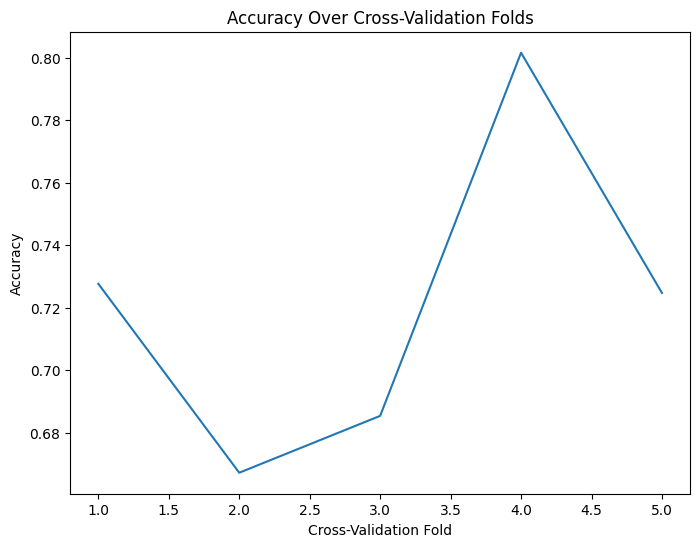

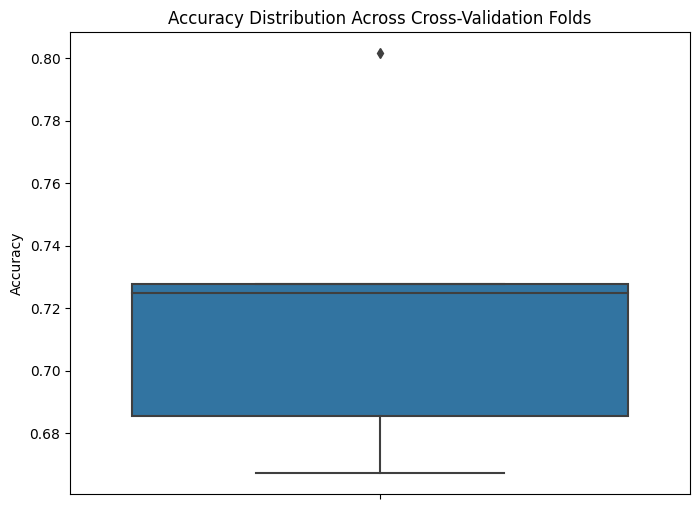

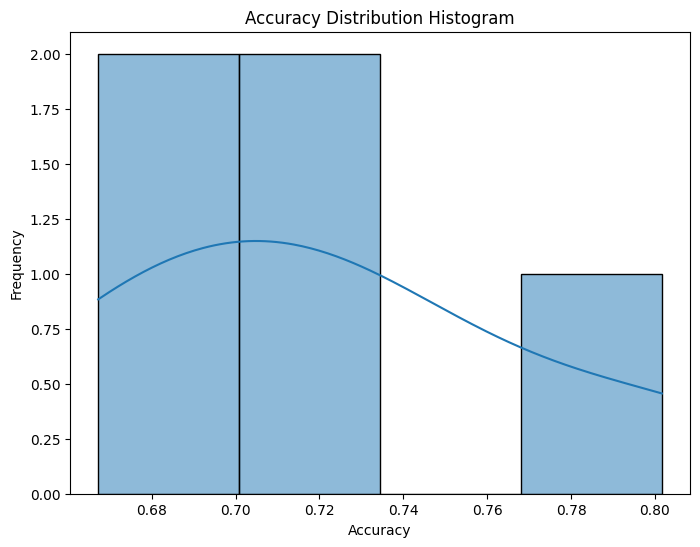

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your accuracy results
# accuracy = [acc1, acc2, ...]

# Plot a line chart showing accuracy over cross-validation folds
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, len(accuracy) + 1), y=accuracy)
plt.xlabel("Cross-Validation Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Cross-Validation Folds")
plt.show()

# Plot a box plot to visualize the distribution of accuracy
plt.figure(figsize=(8, 6))
sns.boxplot(y=accuracy)
plt.ylabel("Accuracy")
plt.title("Accuracy Distribution Across Cross-Validation Folds")
plt.show()

# Create a histogram to see the frequency distribution of accuracy values
plt.figure(figsize=(8, 6))
sns.histplot(accuracy, kde=True)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Accuracy Distribution Histogram")
plt.show()


In [138]:
import numpy as np

# mne imports
import mne
from mne import io
from mne.datasets import sample

# EEGNet-specific imports
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

# PyRiemann imports
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt


In [150]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

def EEGNet(nb_classes, Chans=19, Samples=256,
           dropoutRate=0.5, kernLength=128, F1=8,
           D=2, F2=16, norm_rate=0.25, dropoutType='Dropout'):

    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    input1 = Input(shape=(Chans, Samples, 1))

    block1 = Conv2D(F1, (1, kernLength), padding='same',
                    input_shape=(Chans, Samples, 1),
                    use_bias=False)(input1)
    block1 = BatchNormalization()(block1)
    block1 = DepthwiseConv2D((Chans, 1), use_bias=False,
                             depth_multiplier=D,
                             depthwise_constraint=max_norm(1.))(block1)
    block1 = BatchNormalization()(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D((1, 4))(block1)
    block1 = dropoutType(dropoutRate)(block1)

    block2 = SeparableConv2D(F2, (1, 16),
                            use_bias=False, padding='same')(block1)
    block2 = BatchNormalization()(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D((1, 8))(block2)
    block2 = dropoutType(dropoutRate)(block2)

    flatten = Flatten(name='flatten')(block2)

    dense = Dense(1, activation='sigmoid', name='dense',
                  kernel_constraint=max_norm(norm_rate))(flatten)

    return Model(inputs=input1, outputs=dense)


In [154]:
X=epoch_array
y=epoch_labels
import numpy as np

# Assuming you have X and y defined
# Set the proportions for train, validation, and test sets
train_ratio = 0.5  # 50% for training
val_ratio = 0.25   # 25% for validation
test_ratio = 0.25  # 25% for testing

# Calculate the number of samples for each set
total_samples = len(X)
num_train = int(total_samples * train_ratio)
num_val = int(total_samples * val_ratio)
num_test = total_samples - num_train - num_val

# Generate random indices for shuffling
indices = np.arange(total_samples)
np.random.shuffle(indices)

# Use the shuffled indices to split the data
X_shuffled = X[indices]
Y_shuffled = y[indices]

# Split the data into train, validation, and test sets
X_train = X_shuffled[:num_train]
Y_train = Y_shuffled[:num_train]

X_val = X_shuffled[num_train:num_train + num_val]
Y_val = Y_shuffled[num_train:num_train + num_val]

X_test = X_shuffled[num_train + num_val:]
Y_test = Y_shuffled[num_train + num_val:]

# Optionally, you can return the splits as well
# return X_train, y_train, X_val, y_val, X_test, y_test



In [155]:
Y_train.shape


(4260,)

In [156]:
# Modify this line to have nb_classes = 4


# Assuming your labels are initially (None, 1), reshape them to (None, 2)
Y_train = Y_train.astype(int)
Y_val = Y_val.astype(int)
Y_test = Y_test.astype(int)


kernels, chans, samples = 1, 19, 256

# convert data to NHWC (trials, channels, samples, kernels) format. Data

X_train      = X_train.reshape(X_train.shape[0], chans, samples, kernels)
X_val        = X_val.reshape(X_val.shape[0], chans, samples, kernels)
X_test       = X_test.reshape(X_test.shape[0], chans, samples, kernels)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# configure the EEGNet-8,2,16 model with kernel length of 32 samples (other
# model configurations may do better, but this is a good starting point)
# Modify this line to have nb_classes = 4
model = EEGNet(nb_classes=2, Chans=chans, Samples=samples,
               dropoutRate=0.5, kernLength=32, F1=8, D=2, F2=16,
               dropoutType='Dropout')



# compile the model and set the optimizers
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics = ['accuracy'])

# count number of parameters in the model
numParams    = model.count_params()

# set a valid path for your system to record model checkpoints
checkpointer = ModelCheckpoint(filepath='/tmp/checkpoint.h5', verbose=1,
                               save_best_only=True)

X_train shape: (4260, 19, 256, 1)
4260 train samples
2130 test samples


In [157]:
X_train.shape,Y_train.shape



((4260, 19, 256, 1), (4260,))

In [158]:
import numpy as np

# Assuming you have a y_train array with binary labels (0 or 1)

# Count the number of 0s and 1s
count_0 = np.sum(Y_train == 0)
count_1 = np.sum(Y_train == 1)

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)


Number of 0s: 2091
Number of 1s: 2169


In [ ]:
class_weights = {0:1, 1:1}
ittedModel = model.fit(X_train, Y_train, batch_size = 16, epochs = 10,
                        verbose = 2, validation_data=(X_val, Y_val),
                        callbacks=[checkpointer], class_weight = class_weights)

# load optimal weights
model.load_weights('/tmp/checkpoint.h5')

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.66098, saving model to /tmp/checkpoint.h5
267/267 - 26s - loss: 0.6834 - accuracy: 0.5554 - val_loss: 0.6610 - val_accuracy: 0.6465 - 26s/epoch - 96ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.66098 to 0.52527, saving model to /tmp/checkpoint.h5
267/267 - 21s - loss: 0.5884 - accuracy: 0.6965 - val_loss: 0.5253 - val_accuracy: 0.7545 - 21s/epoch - 80ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.52527 to 0.45717, saving model to /tmp/checkpoint.h5
267/267 - 22s - loss: 0.5085 - accuracy: 0.7556 - val_loss: 0.4572 - val_accuracy: 0.7962 - 22s/epoch - 83ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.45717 to 0.40415, saving model to /tmp/checkpoint.h5
267/267 - 21s - loss: 0.4547 - accuracy: 0.7962 - val_loss: 0.4042 - val_accuracy: 0.8310 - 21s/epoch - 79ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.40415 to 0.36650, saving model to /tmp/checkpoint.h5
267/267 - 26s - loss: 0.4176 - accuracy: 0.8148 - val_loss: 0.3665 - val_accuracy: 0.8620 - 26s/epoch - 97ms/step
Epoch 6/10

Epoch 6: val_loss improved from 0.36650 to 0.33268, saving model to /tmp/checkpoint.h5
267/267 - 20s - loss: 0.3954 - accuracy: 0.8265 - val_loss: 

# Chrononet _ CNN LSTM

In [ ]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np
import mne

In [ ]:
class Block(nn.Module):
  def __init__(self,inplace):
    super().__init__()
    self.conv1=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=2,stride=2,padding=0)
    self.conv2=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=4,stride=2,padding=1)
    self.conv3=nn.Conv1d(in_channels=inplace,out_channels=32,kernel_size=8,stride=2,padding=3)
    self.relu=nn.ReLU()

  def forward(self,x):
    x1=self.relu(self.conv1(x))
    x2=self.relu(self.conv2(x))
    x3=self.relu(self.conv3(x))
    x=torch.cat([x1,x3,x3],dim=1)
    return x


In [ ]:
class ChronoNet(nn.Module):
  def __init__(self,channel):
    super().__init__()
    self.block1=Block(channel)
    self.block2=Block(96)
    self.block3=Block(96)
    self.gru1=nn.GRU(input_size=96,hidden_size=32,batch_first=True)
    self.gru2=nn.GRU(input_size=32,hidden_size=32,batch_first=True)
    self.gru3=nn.GRU(input_size=64,hidden_size=32,batch_first=True)
    self.gru4=nn.GRU(input_size=96,hidden_size=32,batch_first=True)
    self.gru_linear=nn.Linear(64,1)
    self.flatten=nn.Flatten()
    self.fc1=nn.Linear(32,1)
    self.relu=nn.ReLU()
  def forward(self,x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.block3(x)
    x=x.permute(0,2,1)
    gru_out1,_=self.gru1(x)
    gru_out2,_=self.gru2(gru_out1)
    gru_out=torch.cat([gru_out1,gru_out2],dim=2)
    gru_out3,_=self.gru3(gru_out)
    gru_out=torch.cat([gru_out1,gru_out2,gru_out3],dim=2)
    #print('gru_out',gru_out.shape)
    linear_out=self.relu(self.gru_linear(gru_out.permute(0,2,1)))
    gru_out4,_=self.gru4(linear_out.permute(0,2,1))
    x=self.flatten(gru_out4)
    x=self.fc1(x)
    return x